 # Advance Data Science Lab 3
 # Feature Engineering on Audio
 ### Name: Tejas Yogesh Pawar
 ### PRN: 20190802021
 ==============================================================================================

## A. Amplitude Envelope and loudness

### Importing required libraries

In [15]:
import warnings
warnings.filterwarnings('ignore')
import librosa
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

### Loading audio file with librosa library

In [16]:
audio_path = 'Audio_file.wav'
x , sr = librosa.load(audio_path)

### Playing Audio
Using IPython.display.Audio, to play the audio

In [17]:
import IPython.display as ipd
ipd.Audio(audio_path)

You can even use an mp3 or a WMA format for the audio example.

## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveshow: (Note waveplot attribute no more exists in librosa.display anymore hence we I have used .waveshow


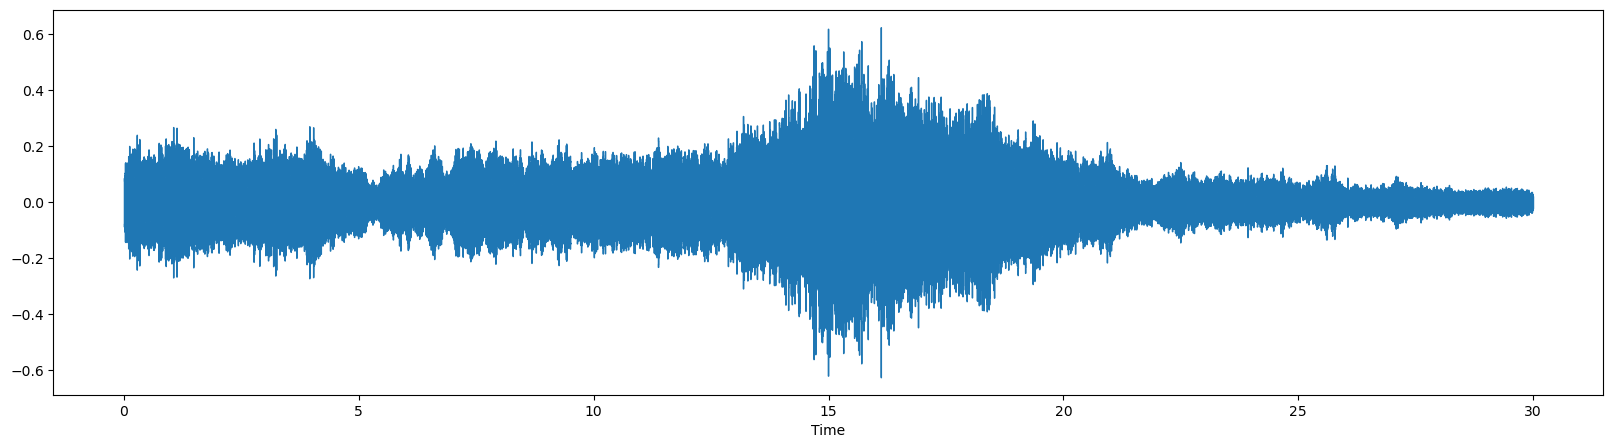

In [20]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

### Spectrogram
We can also display a spectrogram using librosa.display.specshow.

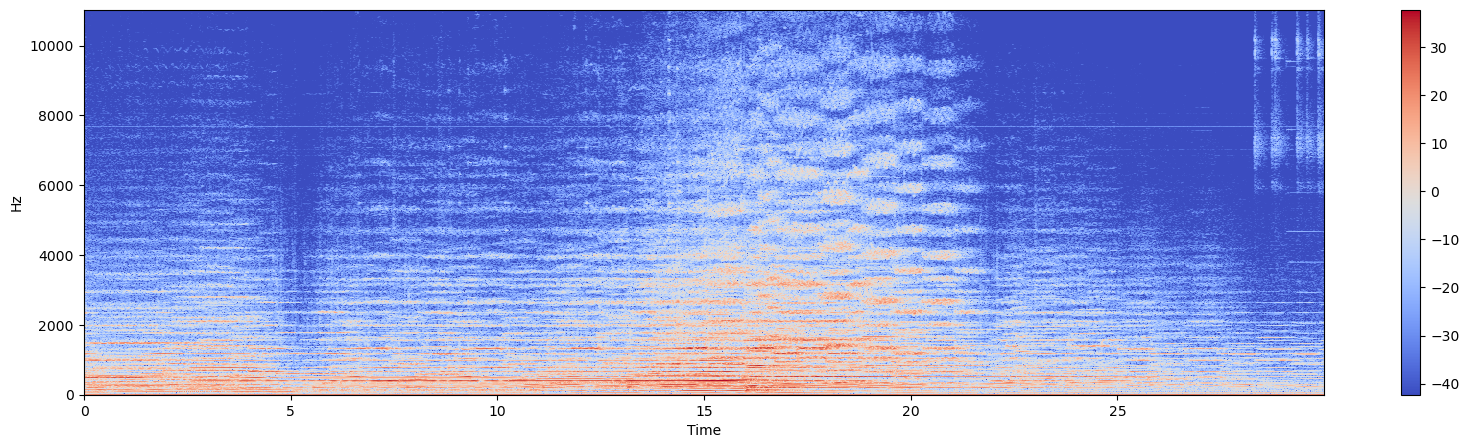

In [21]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log Frequency axis

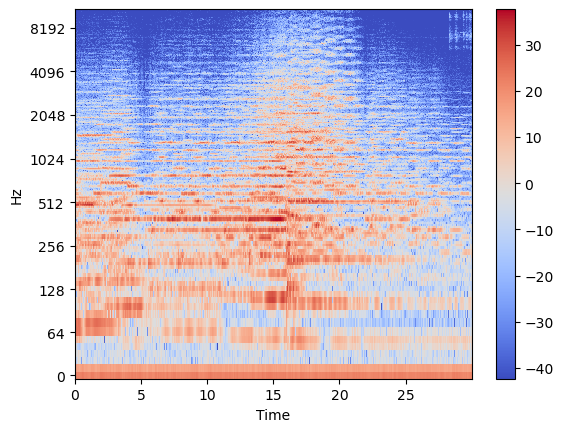

In [22]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Feature Extraction

In [23]:
x, sr = librosa.load('Audio_file.wav')
ipd.Audio(x, rate=sr)

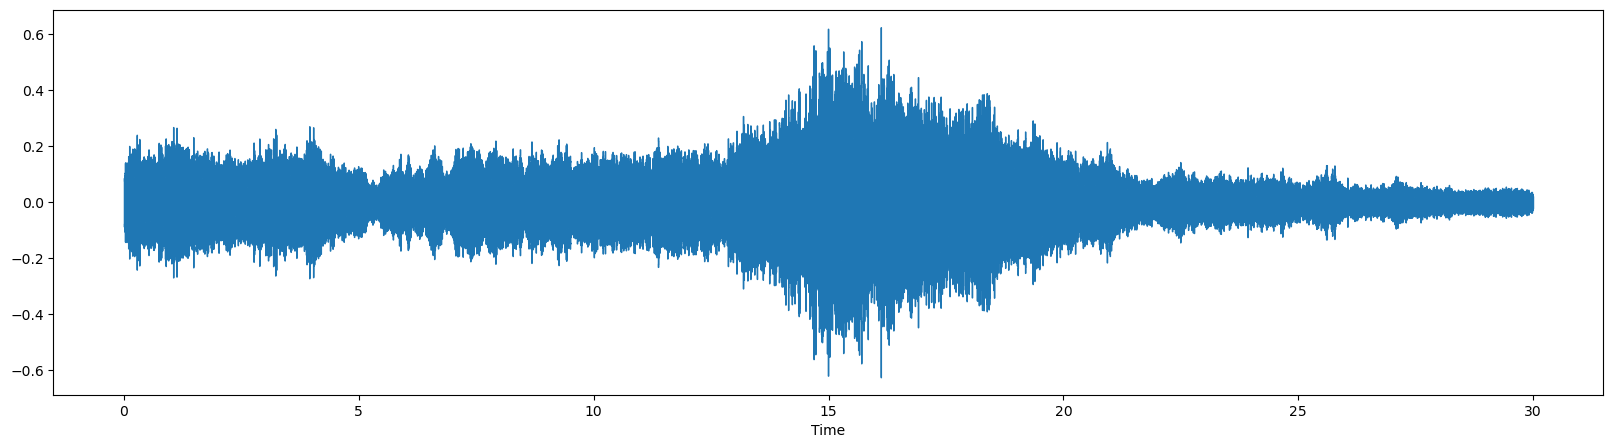

In [25]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

## 1. Zero Crossing Rate

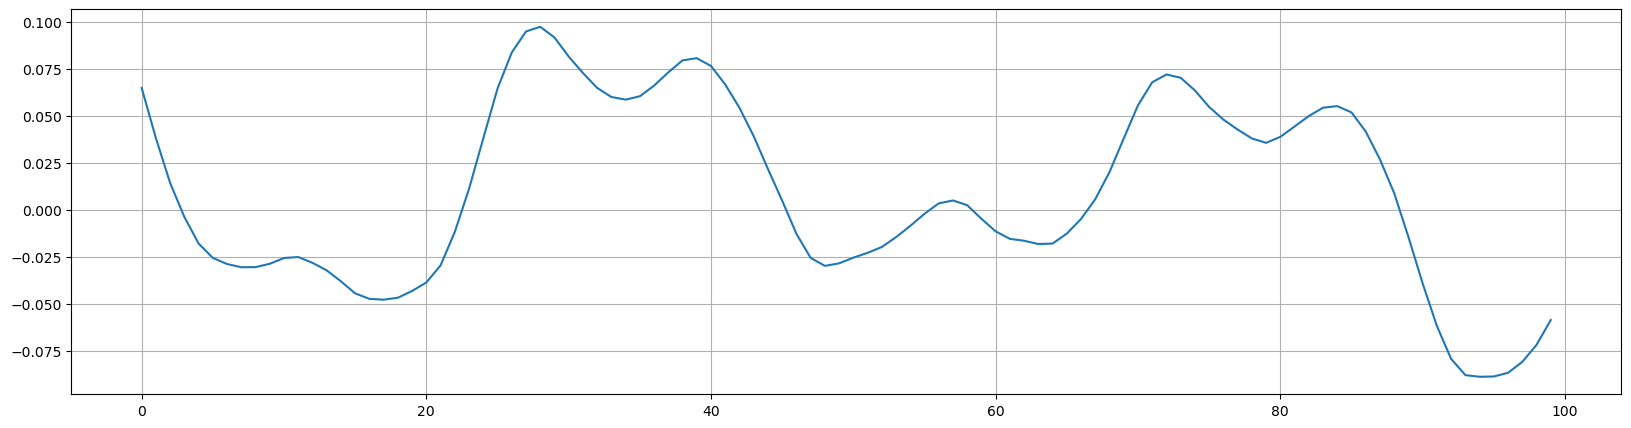

In [26]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [27]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [28]:
print(sum(zero_crossings))

7


# B. Spectral Centroid

In [29]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1292,)

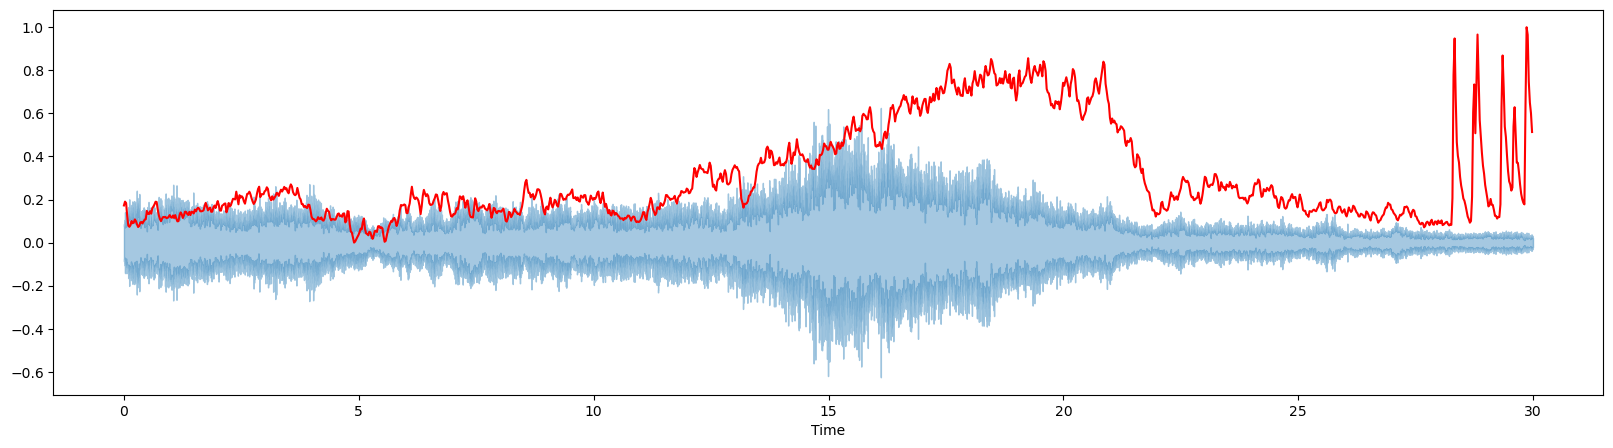

In [31]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Plotting the Spectral Centroid along the waveform.

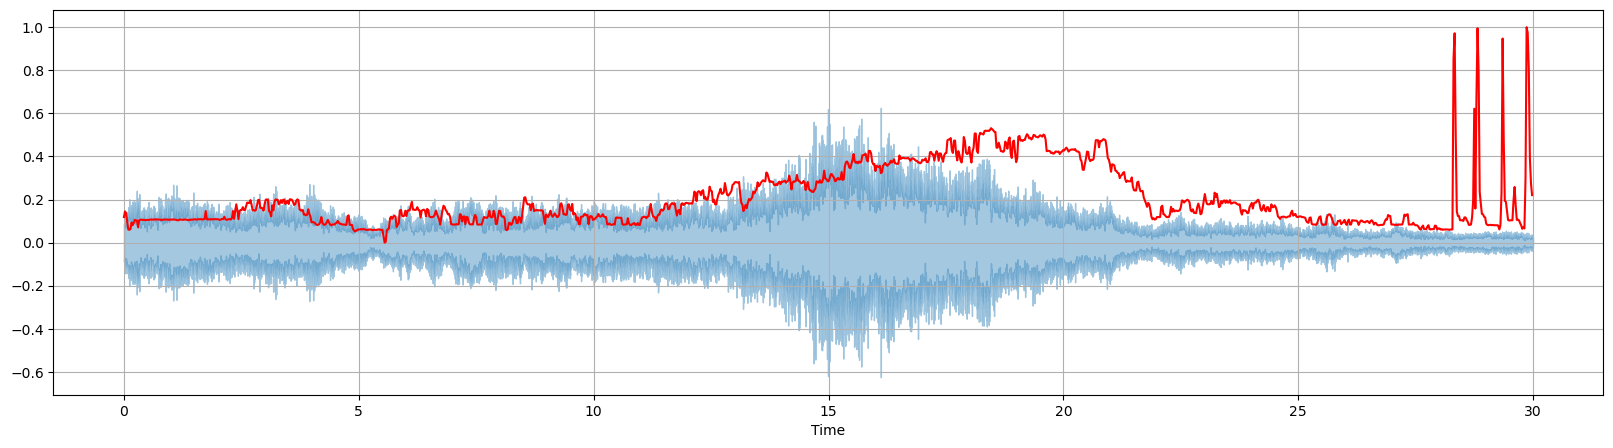

In [33]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

## C. MFCC
MFCC — Mel-Frequency Cepstral Coefficients

The MFCC feature extraction technique basically includes windowing the signal, applying the DFT, taking the log of the magnitude, and then warping the frequencies on a Mel scale, followed by applying the inverse DCT. 

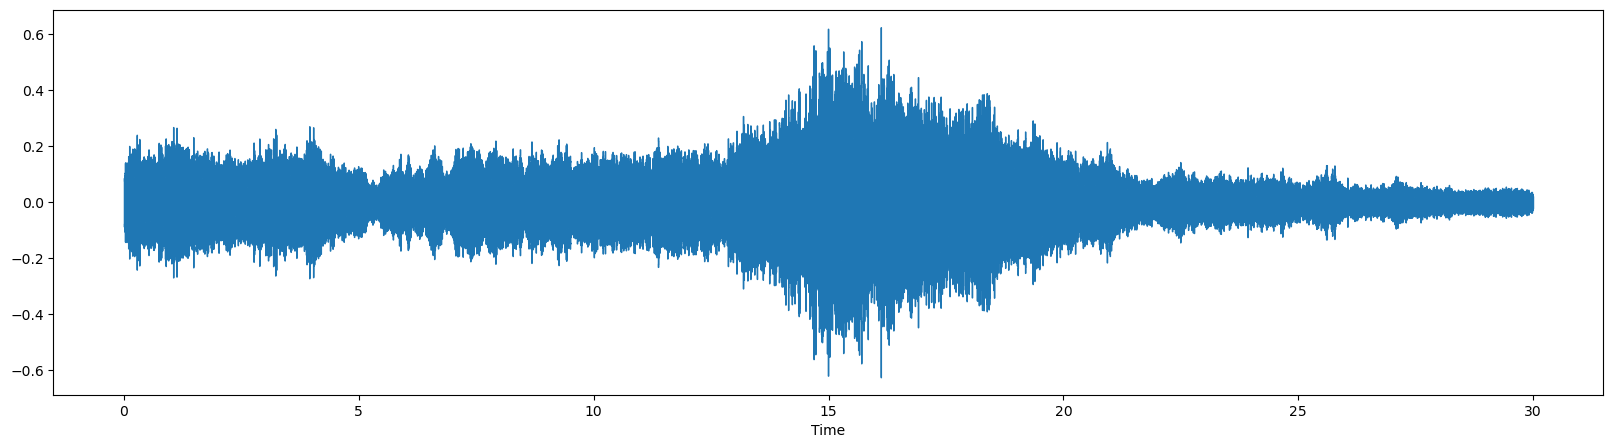

In [36]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('Audio_file.wav')
librosa.display.waveshow(x, sr=sr)

(20, 1292)


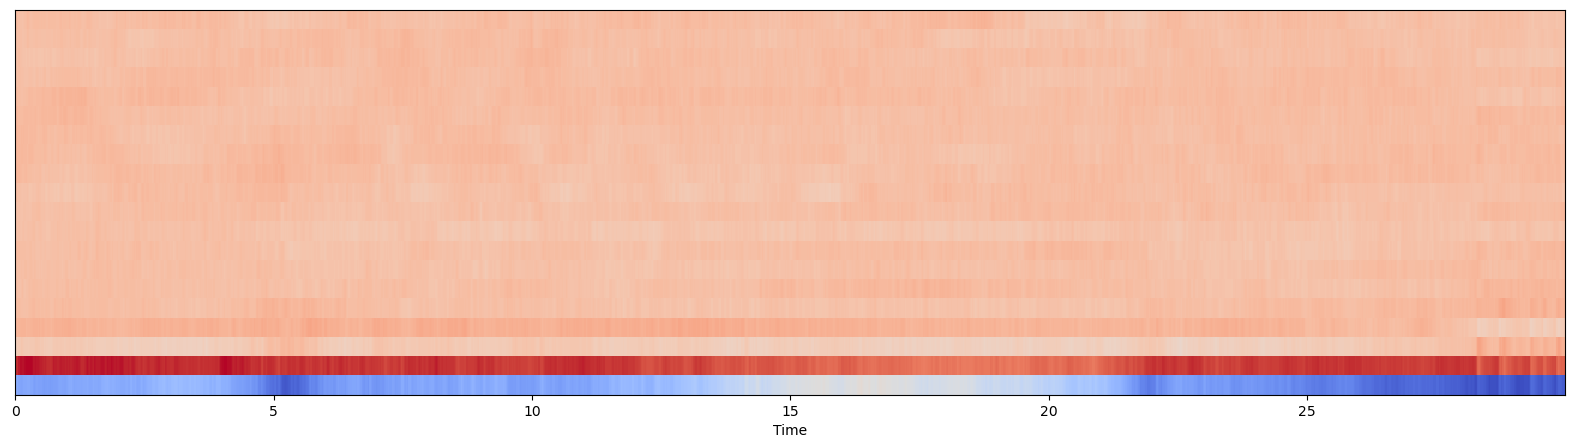

In [37]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.

## D. Pitch salience (Feature Scaling)
Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [40]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-5.9051040e-09  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -5.9051040e-09  0.0000000e+00  1.1810208e-08 -1.1810208e-08
 -1.4762760e-08  0.0000000e+00  0.0000000e+00  1.1810208e-08
 -1.1810208e-08  1.1810208e-08 -1.1810208e-08  5.9051040e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[0.9999998 1.        1.0000001 1.0000001 1.0000002 1.0000001 1.
 1.        1.0000002 1.        1.        1.        1.        1.
 0.9999999 0.9999999 1.        1.        1.        1.0000002]


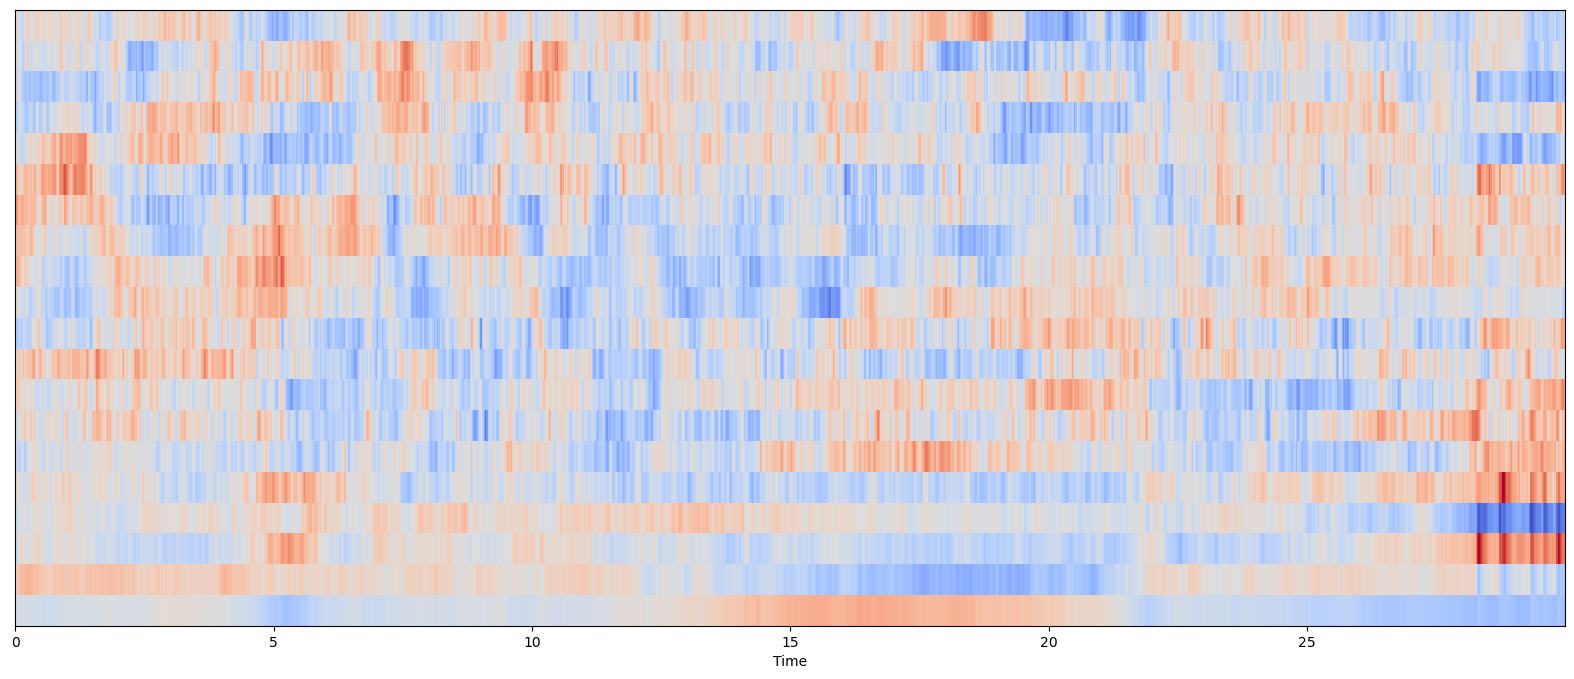

In [41]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## E. Chroma Frequencies

Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale.

In [42]:
# Loadign the file
x, sr = librosa.load('Audio_file.wav')
ipd.Audio(x, rate=sr)

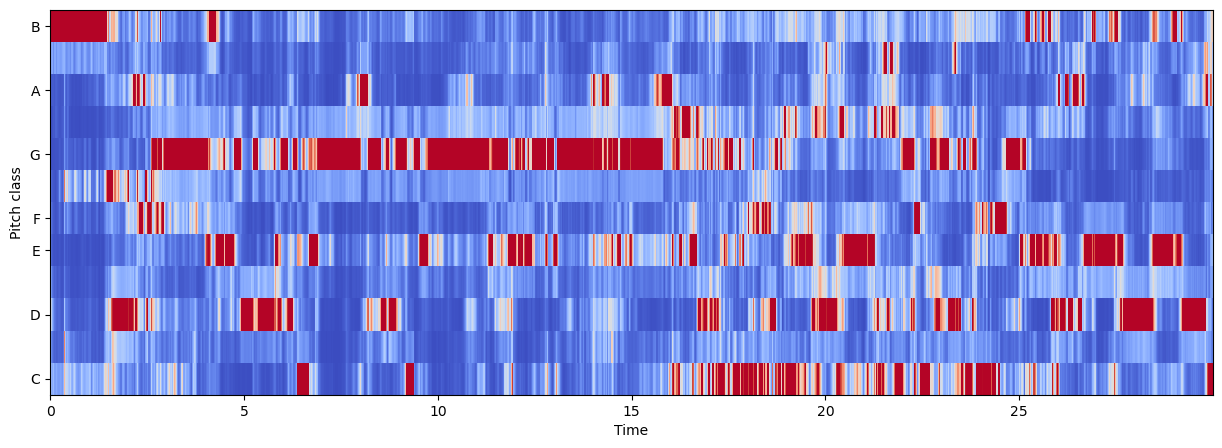

In [43]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## Conclusion:
We have Successfully performed Feature Engineering on Audio and extracted the features of audio signals. We can use this feature extracted in various use cases such as classification into different genres.